In [4]:
import trainer as t

Using TensorFlow backend.


In [5]:
%ls gpu_models

2017-09-06_07:50:04.097107.pkl
2017-09-06_07:50:04.097107_weights.h5
2017-09-06_08:23:46.541937.pkl
2017-09-06_08:23:46.541937_weights.h5
2017-09-06_08:41:11.643176.pkl
2017-09-06_08:41:11.643176_weights.h5
2017-09-06_08:58:36.814574.pkl
2017-09-06_08:58:36.814574_weights.h5
2017-09-06_09:16:01.871976.pkl
2017-09-06_09:16:01.871976_weights.h5
2017-09-06_09:33:27.072678.pkl
2017-09-06_09:33:27.072678_weights.h5
2017-09-06_09:50:52.348742.pkl
2017-09-06_09:50:52.348742_weights.h5
2017-09-06_10:08:17.406715.pkl
2017-09-06_10:08:17.406715_weights.h5
2017-09-06_10:25:42.603510.pkl
2017-09-06_10:25:42.603510_weights.h5
2017-09-06_10:43:07.761344.pkl
2017-09-06_10:43:07.761344_weights.h5
2017-09-06_11:00:33.211076.pkl
2017-09-06_11:00:33.211076_weights.h5
2017-09-06_11:17:57.914539.pkl
2017-09-06_11:17:57.914539_weights.h5
2017-09-06_11:35:22.768091.pkl
2017-09-06_11:35:22.768091_weights.h5
2017-09-06_11:52:47.906478.pkl
2017-09-06_11:52:47.906478_weights.h5
2017-09-06_12:10:13.117335.pkl
201

In [6]:
ctx = t.TrainContext.load_name('gpu_models/2017-09-06_12:10:13.117335',
                               120, 60, 0, 370, 128, 2, 1e-3, 16)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import pplot as ppt

In [9]:
figsize=(20,4)

In [10]:
import pandas as pd
def plot_loss(ctx):
    pd.DataFrame({"loss": ctx.history['loss']}).plot(figsize=figsize)

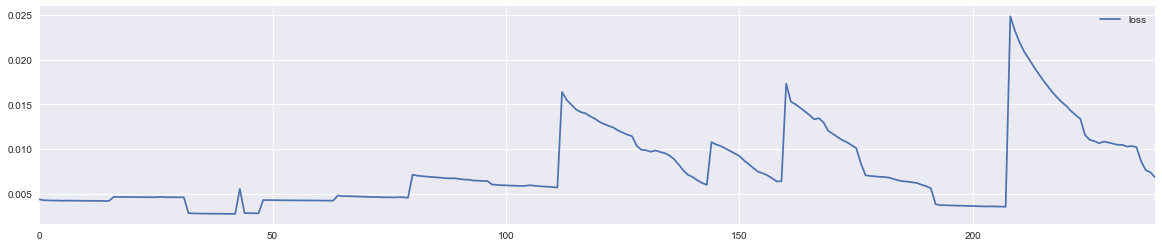

In [11]:
plot_loss(ctx)

# Predicts

In [12]:
from timeit import default_timer as timer

In [13]:
# Takes time to load the dataset
start = timer()
d = t.DataSet()
rindex = 144278
end = timer()
end - start

17.23585120899952

In [14]:
# But not to process it
start = timer()
d.process_index(rindex, 120, 60)
end = timer()
end - start

0.00890742200135719

In [15]:
pred = ctx.predict(d)

In [16]:
help(ppt)

Help on module pplot:

NAME
    pplot

FUNCTIONS
    pta(*args, color_rotate=True)
        pta = plot them all
    
    ptt(*args)
        ptt = plot them together

FILE
    /Users/paulm/code/web-traffic-time-series-forecasting/pplot.py




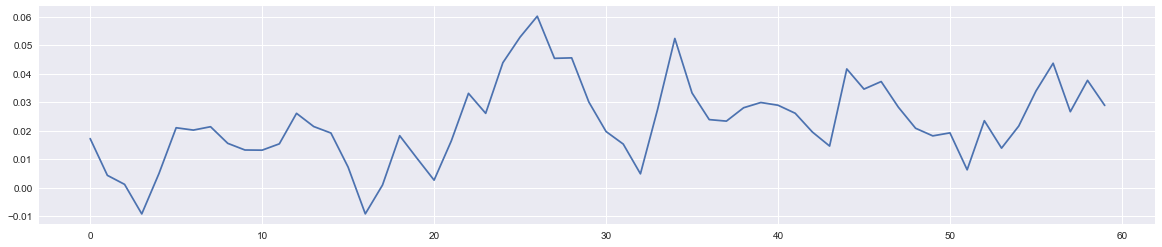

In [17]:
ppt.pta(pred.squeeze())

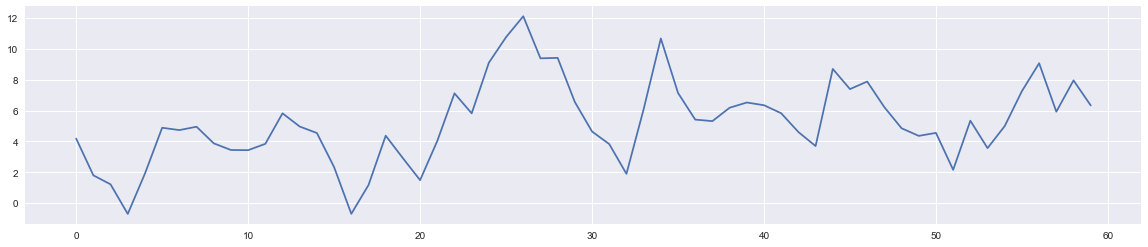

In [18]:
ppt.pta(d.descale(pred).squeeze())

# Predict Time

In [19]:
basepath = 'data'

In [20]:
submission = pd.read_csv(f'{basepath}/sample_submission_1.csv')

In [106]:
submission[:4]

,Id,Visits
0,bf4edcf969af,0
1,929ed2bf52b9,0
2,ff29d0f51d5c,0
3,e98873359be6,0


In [21]:
key = pd.read_csv(f'{basepath}/key_1.csv')

In [108]:
key[:4]

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6


In [96]:
import re
datr = re.compile('.*(\d{4}-\d{2}-\d{2})$')
def get_page_and_date(s):
    m = datr.match(s)
    datestr = m.group(1)
    keystr = s[0:m.start(1)-1]
    return keystr, datestr

In [104]:
i = 0
for sind, sid, svis in submission.itertuples():
    print(sind, sid, svis)
    i += 1
    if i == 10:
        break

0 bf4edcf969af 0
1 929ed2bf52b9 0
2 ff29d0f51d5c 0
3 e98873359be6 0
4 fa012434263a 0
5 48f1e93517a2 0
6 5def418fcb36 0
7 77bd08134351 0
8 5889e6dbb16f 0
9 5f21fef1d764 0


In [112]:
for kind, kpage, kid in key[key.Id == sid].itertuples():
    print(get_page_and_date(kpage))

('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-10')


In [113]:
count = 20

In [115]:
def get_sub_info(subm, keym, count=None):
    info = []
    for sind, sid, svis in subm.itertuples():
        if count is not None:
            count = count - 1
            if count == 0:
                return info
    
        for kind, kpage, kid in key[key.Id == sid].itertuples():
            info.append(get_page_and_date(kpage))
    return info

In [123]:
%time get_sub_info(submission, key, 100)

CPU times: user 1min 34s, sys: 838 ms, total: 1min 35s
Wall time: 1min 36s


[('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-01'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-02'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-03'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-04'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-05'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-06'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-07'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-08'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-09'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-10'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-11'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-12'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-13'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-14'),
 ('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-15'),
 ('!vote_en.wikipedia.org

In [122]:
len(submission)

8703780

# 1 second per row - this clearly isn't going to work

### Use this to see magic info 
%magic

# DataFrame Indexing

In [126]:
key.columns

Index(['Page', 'Id'], dtype='object')

In [127]:
key[:4]

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6


In [134]:
%time pd.concat([submission, key], axis=1)

CPU times: user 662 ms, sys: 590 ms, total: 1.25 s
Wall time: 1.46 s


,Id,Visits,Page,Id
0,bf4edcf969af,0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,929ed2bf52b9,0,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,ff29d0f51d5c,0,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,e98873359be6,0,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,fa012434263a,0,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a
5,48f1e93517a2,0,!vote_en.wikipedia.org_all-access_all-agents_2...,48f1e93517a2
6,5def418fcb36,0,!vote_en.wikipedia.org_all-access_all-agents_2...,5def418fcb36
7,77bd08134351,0,!vote_en.wikipedia.org_all-access_all-agents_2...,77bd08134351
8,5889e6dbb16f,0,!vote_en.wikipedia.org_all-access_all-agents_2...,5889e6dbb16f
9,5f21fef1d764,0,!vote_en.wikipedia.org_all-access_all-agents_2...,5f21fef1d764


In [135]:
joined = pd.concat([submission, key], axis=1)

In [137]:
joined.Page[:4]

0    !vote_en.wikipedia.org_all-access_all-agents_2...
1    !vote_en.wikipedia.org_all-access_all-agents_2...
2    !vote_en.wikipedia.org_all-access_all-agents_2...
3    !vote_en.wikipedia.org_all-access_all-agents_2...
Name: Page, dtype: object

In [138]:
type(joined.Page[:4])

pandas.core.series.Series

In [142]:
joined[:4].Page

0    !vote_en.wikipedia.org_all-access_all-agents_2...
1    !vote_en.wikipedia.org_all-access_all-agents_2...
2    !vote_en.wikipedia.org_all-access_all-agents_2...
3    !vote_en.wikipedia.org_all-access_all-agents_2...
Name: Page, dtype: object

In [188]:
joined.iloc[:4].Page.asobject

array(['!vote_en.wikipedia.org_all-access_all-agents_2017-01-01',
       '!vote_en.wikipedia.org_all-access_all-agents_2017-01-02',
       '!vote_en.wikipedia.org_all-access_all-agents_2017-01-03',
       '!vote_en.wikipedia.org_all-access_all-agents_2017-01-04'], dtype=object)

In [146]:
type(joined[:4].Page.asobject[0])

str

In [159]:
i = 0
for _, r in joined.iterrows():
    print(r.Page)
    print(type(r.Page))
    i += 1
    if i == 4:
        break

!vote_en.wikipedia.org_all-access_all-agents_2017-01-01
<class 'str'>
!vote_en.wikipedia.org_all-access_all-agents_2017-01-02
<class 'str'>
!vote_en.wikipedia.org_all-access_all-agents_2017-01-03
<class 'str'>
!vote_en.wikipedia.org_all-access_all-agents_2017-01-04
<class 'str'>


In [163]:
def get_sub_info(subm, keym, count=None):
    info = []
    j = pd.concat([subm, keym], axis=1)
    for _, r in j.iterrows():
        if count is not None:
            count = count - 1
            if count == 0:
                return info
    
        info.append(get_page_and_date(r.Page))
    return info

In [178]:
%time pred_info = get_sub_info(submission, key, 1000)

CPU times: user 4.81 s, sys: 5.36 s, total: 10.2 s
Wall time: 11.6 s


In [166]:
5.56 / 1000

0.00556

# 5 ms much more useable

In [169]:
d.npdata.shape

(550,)

In [170]:
d.data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [176]:
d.data[rindex:rindex+1].Page.asobject[0]

'Región_Amazónica_(Colombia)_es.wikipedia.org_all-access_spider'

In [184]:
d.data.iloc[rindex].Page

'Región_Amazónica_(Colombia)_es.wikipedia.org_all-access_spider'

In [175]:
rindex

144278

In [177]:
d.npdata[0:10]

array([ 0.02162162,  0.01081081,  0.04324324,  0.02702703,  0.01621622,
        0.02162162,  0.05405406,  0.09189189,  0.04864865,  0.03783784], dtype=float32)

In [180]:
pred_info[0]

('!vote_en.wikipedia.org_all-access_all-agents', '2017-01-01')

In [182]:
%time d.data[d.data.Page == pred_info[0][0]]

CPU times: user 19.2 ms, sys: 625 µs, total: 19.8 ms
Wall time: 19.4 ms


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
37206,!vote_en.wikipedia.org_all-access_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0


In [194]:
d.data[d.data.Page == pred_info[0][0]].index[0]

37206

In [195]:
d.data[d.data.Page == pred_info[0][0]]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
37206,!vote_en.wikipedia.org_all-access_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0
